# Exploratory Data Analysis - PoC Data

This loads the class `DataHandler` which is a class that should be able to process data comming either from `PoC` or `CARMA`

In [1]:
from collector.handler import DataHandler

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In particular we consider one of the `CARMA` datasets

In [3]:
# csv path 
csvpath = 'data/raw/poc/data68_mieux.csv'
experiment = DataHandler(csvpath)

In [4]:
experiment.compute_response_times()

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data68_mieux


In [5]:
experiment.data

,elapsed_time (s),Speed - 0,distToPVeh_CACC_follower1,Speed - 1,distToPVeh_CACC_follower4,Speed - 4,distToPVeh_CACC_follower3,Speed - 3,distToPVeh_CACC_follower2,Speed - 2,...,0_Change,1_Change,2_Change,3_Change,4_Change,0_Detection,1_Detection,2_Detection,3_Detection,4_Detection
0,0.00,NaN,NaN,NaN,NaN,NaN,6.0,2.38,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,0.05,2.40,4.0,1.80,NaN,0.96,6.0,2.36,4.0,1.78,...,False,False,False,True,False,False,False,False,False,False
2,0.10,2.44,4.0,1.82,NaN,0.98,6.0,2.36,4.0,1.78,...,True,True,True,True,False,False,False,False,False,False
3,0.15,2.50,4.0,1.84,NaN,0.98,6.0,2.34,4.0,1.76,...,True,True,True,True,False,False,False,False,False,False
4,0.20,2.52,4.0,1.84,NaN,1.00,6.0,2.32,4.0,1.76,...,True,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,359.80,2.44,NaN,11.64,79.0,6.98,39.0,11.12,80.0,9.98,...,False,False,False,False,False,False,False,False,False,False
7197,359.85,2.40,NaN,11.60,79.0,6.98,38.0,11.08,80.0,9.98,...,False,False,False,False,False,False,False,False,False,False
7198,359.90,2.36,NaN,11.62,79.0,6.98,38.0,11.16,80.0,9.90,...,False,False,False,False,False,False,False,False,False,False
7199,359.95,2.28,NaN,11.58,79.0,7.04,38.0,11.16,80.0,9.98,...,False,False,False,False,False,False,False,False,False,False


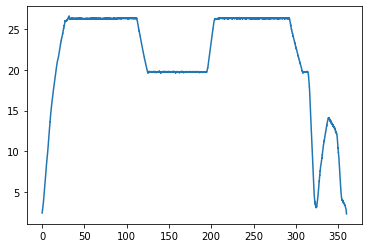

In [45]:
plt.plot(experiment.data['elapsed_time (s)'], experiment.data['Speed - 0'])

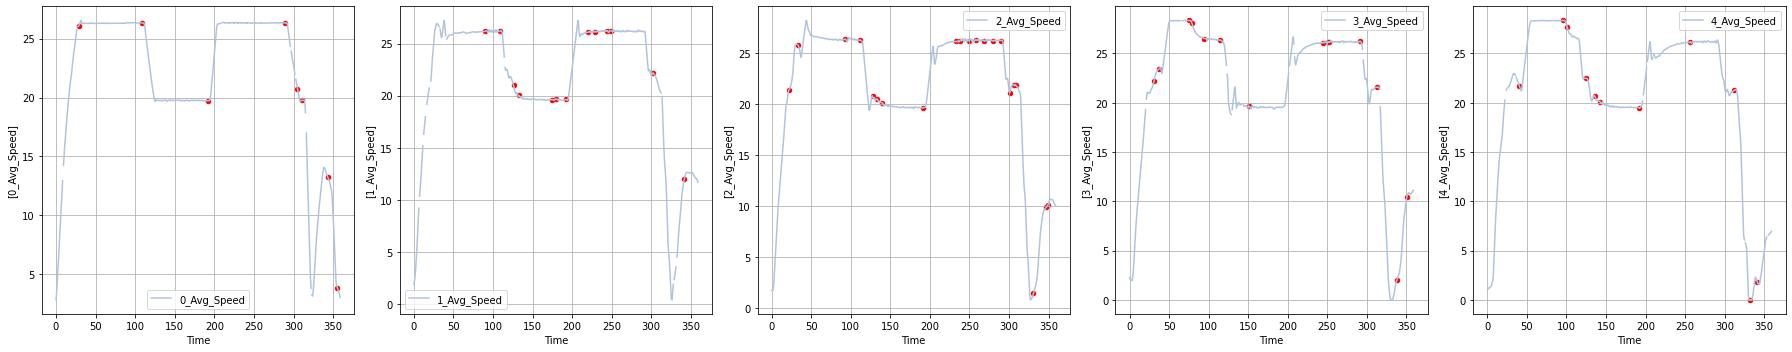

In [5]:
experiment.plot_speed_timedetections()

After passing the path towards the file we execute the method `compute_response_times` which is responsible for loading, cleaning, and computing the corresponding times 

In [7]:
experiment._transitiontimes

,vehid,value
0,0,28.55
1,0,108.45
2,0,191.25
3,0,289.05
4,0,304.75
...,...,...
325,4,192.25
326,4,255.55
327,4,311.95
328,4,331.75


**As it can be seen there is one error in the computation with the PoC data, things to verify.** 
1. **Are the columns the right ones?** 
*ok it has been changed : speed_CACC instead of global_yaw_PINPOINT and elapsed_time (s) instead of utc_bin_formatted
2. **is the data correctly imported/ cleaned?**

**Note**: This code should be usable after fixing the errors in the computation, it is left as raw before final review

In [8]:
# Time between vehicle i-1 and vehicle i
experiment._compute_leader_follower_times()

,1,2,3,4
0,0.00,NaN,NaN,NaN
1,NaN,4.30,NaN,NaN
2,NaN,NaN,-2.00,NaN
3,NaN,NaN,NaN,9.30
4,0.35,NaN,NaN,NaN
5,NaN,2.75,NaN,NaN
6,NaN,NaN,2.65,NaN
7,NaN,NaN,NaN,10.75
8,0.65,NaN,NaN,NaN
9,NaN,-0.15,NaN,NaN


In [9]:
# Time between vehicle 1 and vehicle i
experiment._compute_head_follower_times()

,1,2,3,4
0,0.00,NaN,NaN,NaN
1,NaN,4.30,NaN,NaN
2,NaN,NaN,2.30,NaN
3,NaN,NaN,NaN,11.6
4,0.35,NaN,NaN,NaN
5,NaN,3.10,NaN,NaN
6,NaN,NaN,5.75,NaN
7,NaN,NaN,NaN,16.5
8,0.65,NaN,NaN,NaN
9,NaN,0.50,NaN,NaN


## Explore the whole amount of files 

In this case we are going to process all data from `CARMA`

In [18]:
from glob import glob

filenames = glob('data/raw/poc/*.csv')
filenames

['data/raw/poc\\data28_mieux.csv',
 'data/raw/poc\\data29_mieux.csv',
 'data/raw/poc\\data30_mieux.csv',
 'data/raw/poc\\data49_mieux.csv',
 'data/raw/poc\\data50_mieux.csv',
 'data/raw/poc\\data51_mieux.csv',
 'data/raw/poc\\data52_mieux.csv',
 'data/raw/poc\\data53_mieux.csv',
 'data/raw/poc\\data68_mieux.csv',
 'data/raw/poc\\data69_mieux.csv',
 'data/raw/poc\\data70_mieux.csv',
 'data/raw/poc\\data71_mieux.csv',
 'data/raw/poc\\data72_mieux.csv']

In [24]:
experiments = [DataHandler(file) for file in filenames]

We can now compute the transition times, detection of response times in each vehicle

In [25]:
[e.compute_response_times() for e in experiments];

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data28_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data29_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data30_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data49_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data50_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data51_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data52_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data53_mieux
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: poc\data6

Let's compute the leader follower response times 

In [26]:
import pandas as pd

rtlf= [lf._compute_leader_follower_times() for lf in experiments]
rtlf = pd.concat(rtlf)

This represents the response time between the leader `i-1` and the follower `i`

In [27]:
rtlf.head()

,1,2,3,4
0,4.45,NaN,NaN,NaN
1,NaN,1.25,NaN,NaN
2,NaN,NaN,1.2,NaN
3,NaN,NaN,NaN,2.45
0,3.00,NaN,NaN,NaN


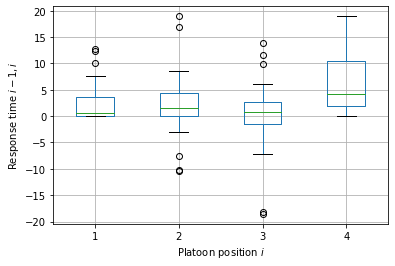

In [28]:
a = rtlf.boxplot();
a.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $i-1,i$');

In [29]:
rt0f= [lf._compute_head_follower_times() for lf in experiments]
rt0f = pd.concat(rt0f)

This represents the time between vehicle `0` and vehicle `i`

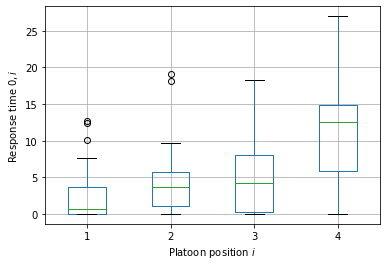

In [30]:
a = rt0f.boxplot();
a.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $0,i$');

A. Ladino